In [1]:
!nvidia-smi

Tue Dec 24 14:29:25 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import zipfile 

with zipfile.ZipFile('/kaggle/input/insect/data4', 'r') as zip_ref:

     zip_ref.extractall()

In [ ]:
import os

HOME = os.getcwd()

print(HOME)
#/kaggle/input/insect-aug/test

In [2]:
#%pip install ultralytics supervision roboflow
!pip install git+https://github.com/ultralytics/ultralytics.git@main
import ultralytics
ultralytics.checks()

Ultralytics 8.3.54 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6037.6/8062.4 GB disk)


In [3]:
from ultralytics import YOLO

from PIL import Image

import requests



model = YOLO('yolo11x.pt')


100%|██████████| 109M/109M [00:00<00:00, 271MB/s] 


In [4]:
# !mkdir {HOME}/datasets

# %cd {HOME}/datasets



# from google.colab import userdata







#from roboflow import Roboflow

#rf = Roboflow(api_key="Pbeyw1RPrfo833HswoH1")

#project = rf.workspace("project-lrivq").project("yellow-sticky-traps-bwxut")

#version = project.version(5)

#dataset = version.download("yolov11")

#/kaggle/input/insectaug
#/kaggle/input/insect-aug/test

!yolo task=detect mode=train model=yolo11x.pt data='/kaggle/input/insect2/all_after_remove/data.yaml' imgsz=640 epochs=20 batch=8 plots=True 

Ultralytics 8.3.54 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.pt, data=/kaggle/input/insect2/all_after_remove/data.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

In [5]:
%cd {HOME}
##############5,3

#model.train(data="/kaggle/input/insectaug/data.yaml",imgsz=640,epochs=40,plots=True)
####43
####4h 22m
print('ibra') 

[Errno 2] No such file or directory: '{HOME}'
/kaggle/working
ibra


**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [ ]:
!ls {HOME}/runs/detect/train/#/kaggle/input/insect/data4  

In [5]:
from collections import Counter
import glob

 
folder_path = '/kaggle/input/insect/data4/valid/labels/*.txt'


class_counts = Counter()


label_files = glob.glob(folder_path)

for file in label_files:
    with open(file, 'r') as f:
        for line in f:
            
            if line.strip():
                
                first_number = int(line.split()[0])
                
                class_counts[first_number] += 1


print("Counts of each number:")
for key, value in class_counts.items():
    print(f"Number {key}: {value} times")


Counts of each number:
Number 1: 4275 times
Number 2: 1561 times
Number 0: 1094 times


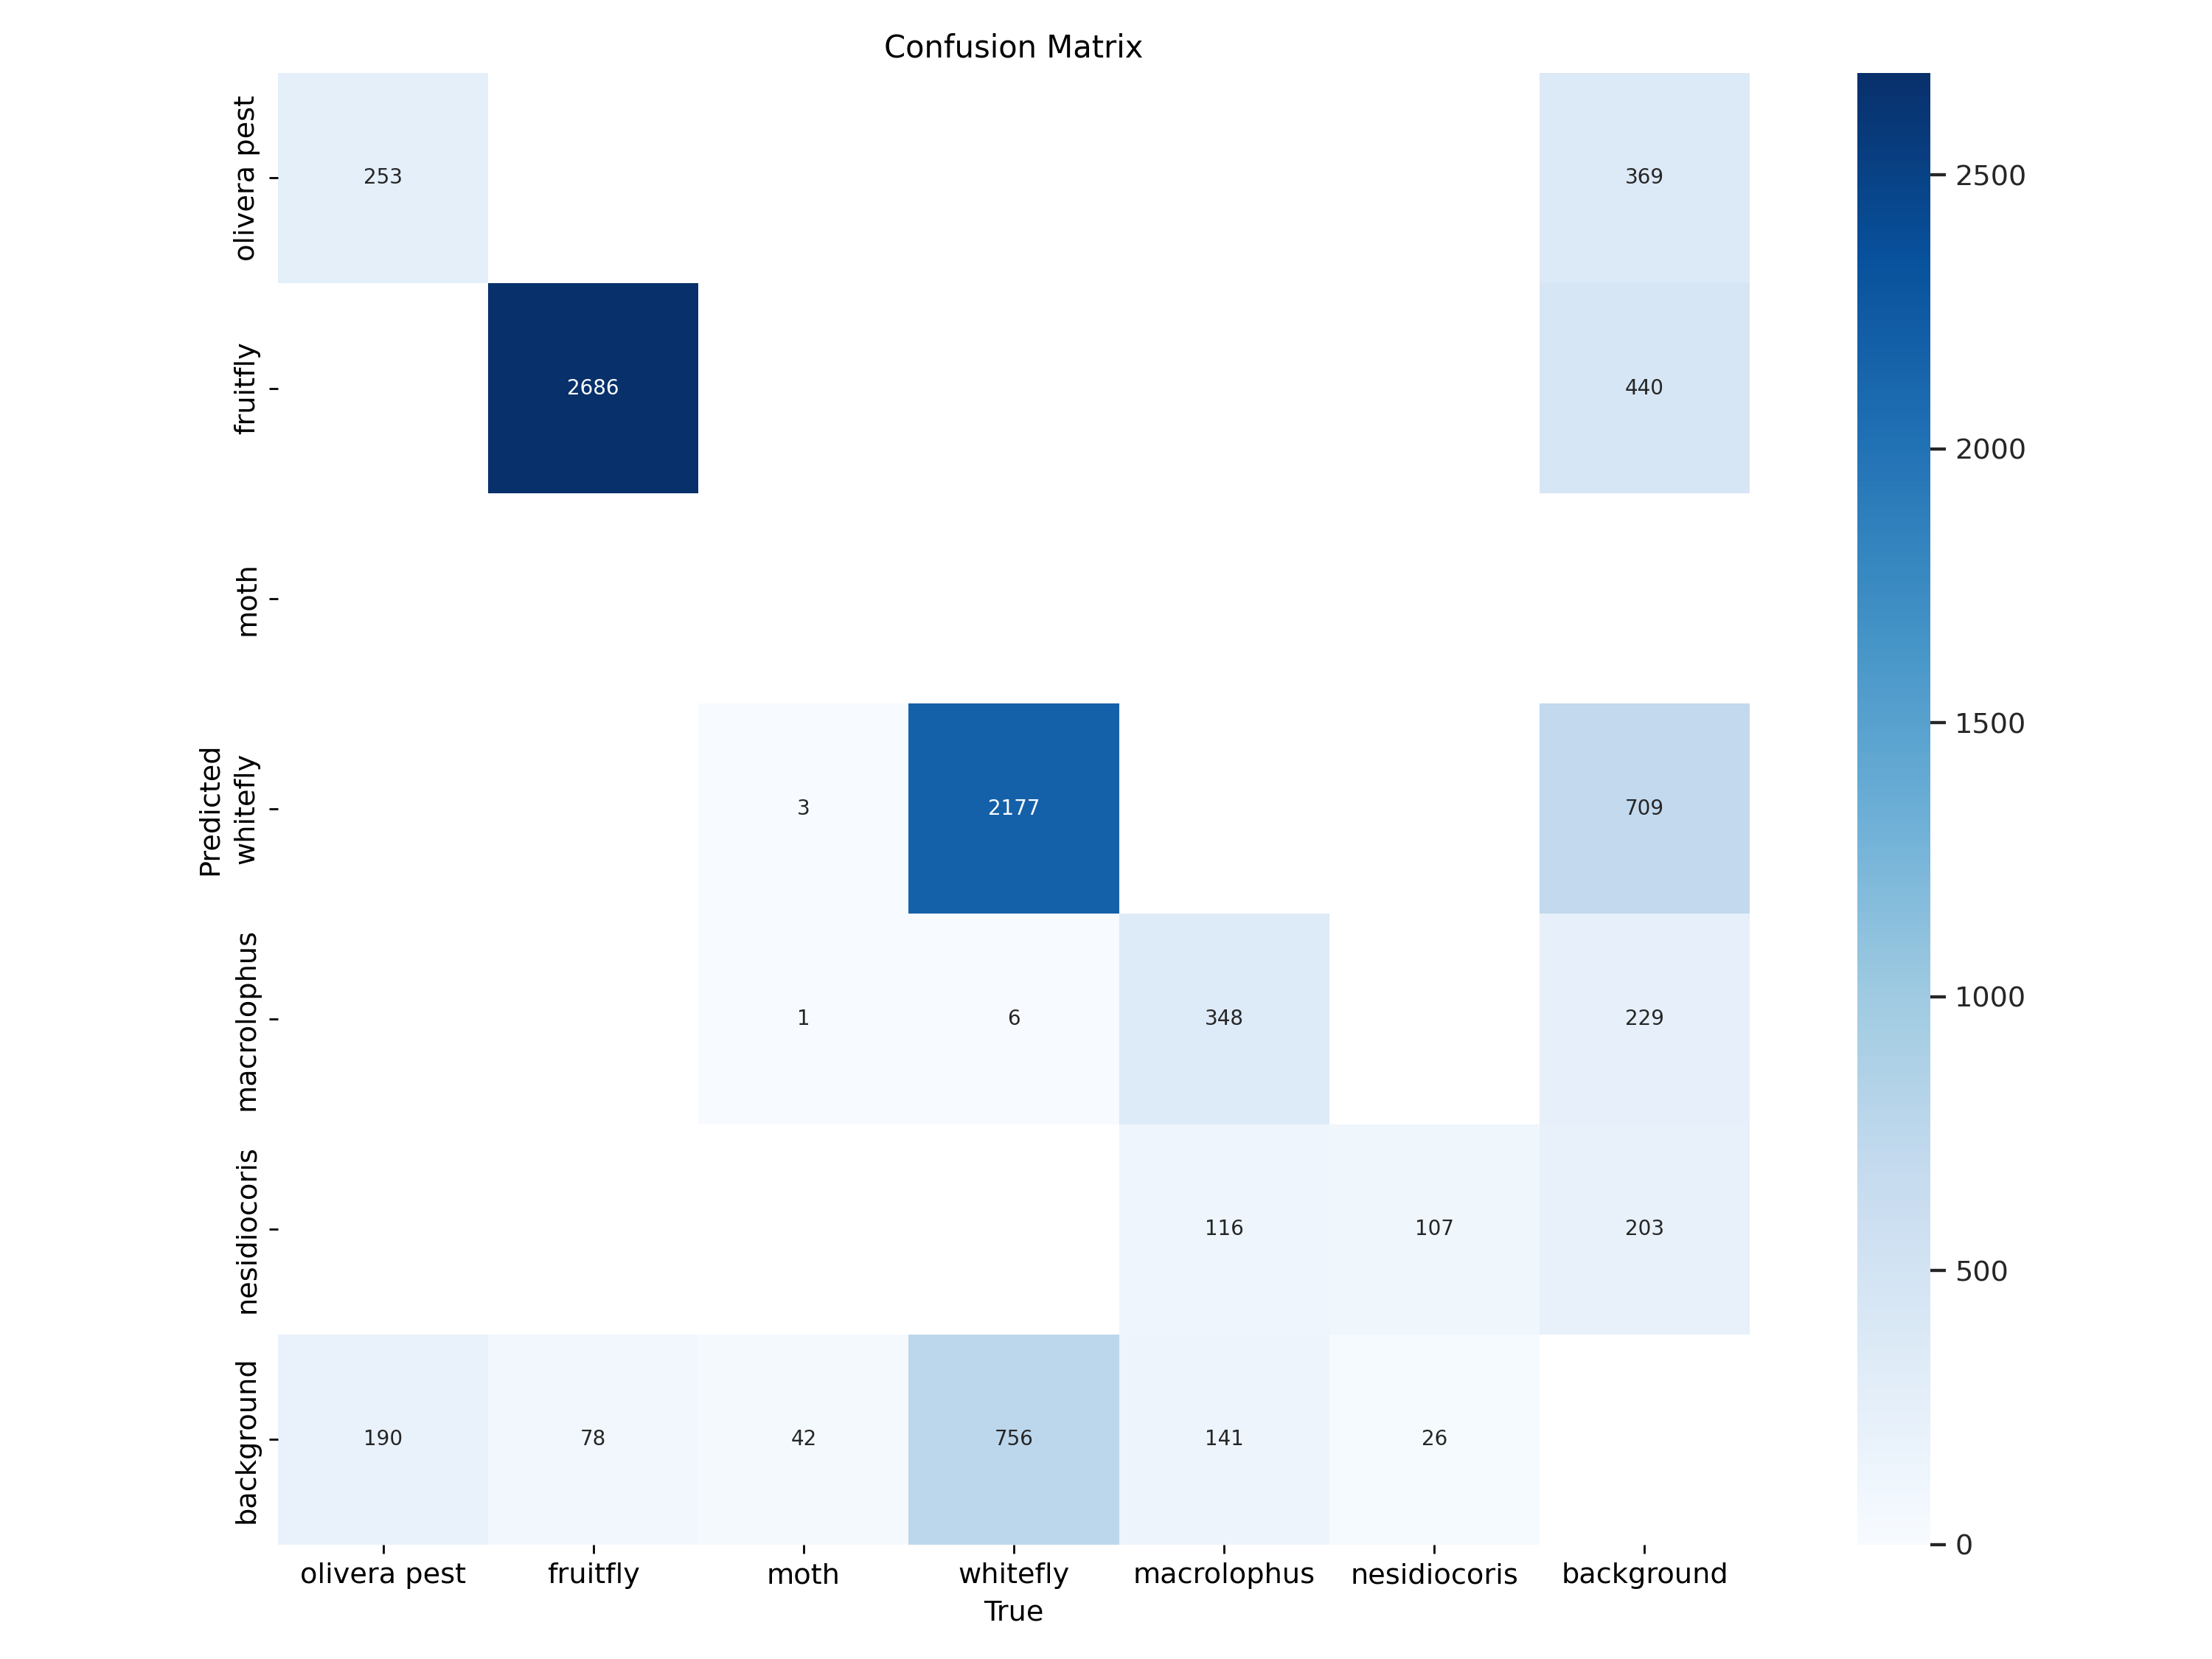

In [12]:
from IPython.display import Image as IPyImage

#{HOME}/runs/detect/train2/weights/confusion_matrix.png

IPyImage(filename='/kaggle/working/runs/detect/train3/confusion_matrix.png', width=600)

In [ ]:
from IPython.display import Image as IPyImage



IPyImage(filename='/kaggle/working/runs/detect/train/results.png', width=600)

In [ ]:
from IPython.display import Image as IPyImage



IPyImage(filename='/kaggle/working/runs/detect/train/train_batch0.jpg', width=5000)

In [ ]:
!zip -r weights.zip /content/runs/detect/train/weights

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

**NOTE:** Let's take a look at few results.

In [ ]:
import glob

import os

from IPython.display import Image as IPyImage, display



latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)

for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:

    display(IPyImage(filename=img, width=600))

    print("\n")